In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

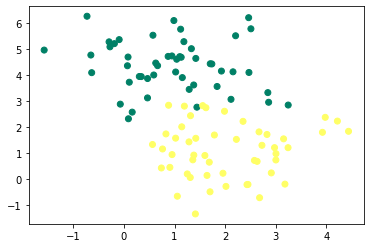

In [2]:
x,y=make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y=y.reshape((y.shape[0],1))
plt.scatter(x[:,0],x[:,1], c=y, cmap='summer')

In [3]:
def initialisation(x):
    w=np.random.randn(x.shape[1],1)
    b=np.random.randn(1)
    return(w,b)

In [4]:
w,b=initialisation(x)
w.shape


(2, 1)

In [5]:
def model(x,w,b):
    z=x.dot(w)+b
    a=1/(1+np.exp(-z))
    return a

In [6]:
a=model(x,w,b)
a.shape

(100, 1)

In [7]:
def log_loss(a,y):
    return 1/len(y)*np.sum(-y*np.log(a)-(1-y)*np.log(1-a))

In [8]:
log_loss(a,y)

2.129843680409779

In [9]:
def gradients(a,x,y):
    dw=1/len(y)*np.dot(x.T,a-y)
    db=1/len(y)*np.sum(a-y)
    return(dw,db)

In [10]:
dw,db=gradients(a,x,y)
db

-0.48492900567379965

In [11]:
def update(dw,db,w,b,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return(w,b)

In [12]:
learning_rate=0.1
w,b=update(dw,db,w,b,learning_rate)
w.shape

(2, 1)

In [39]:
def predict(x,w,b):
    a=model(x,w,b)
    print(a)
    return a>=0.5

In [48]:
def neurones(x,y,learning_rate=0.1,n_iter=100):
    #intialisation de w et b
    w,b=initialisation(x)
    loss=[]
    history=[]
    for i in range (n_iter):
        a=model(x,w,b)
        loss.append(log_loss(a,y))
        dw,db=gradients(a,x,y)
        w,b=update(dw,db,w,b,learning_rate)
        history.append([w,b,loss,i])
        
    y_pred=predict(x,w,b)
    print(accuracy_score(y,y_pred))
    
    plt.plot(loss)
    plt.show()
    
    return history
        

[[9.90912710e-01]
 [7.12681249e-01]
 [1.89505715e-03]
 [7.05823732e-02]
 [9.84136246e-01]
 [3.27372237e-01]
 [5.00494361e-02]
 [9.83936889e-01]
 [2.74412335e-02]
 [8.56271703e-01]
 [1.78552142e-02]
 [8.84936583e-01]
 [1.88863458e-02]
 [7.66725826e-03]
 [7.43032358e-01]
 [9.95961429e-01]
 [9.96197502e-01]
 [1.79938641e-02]
 [6.55271860e-01]
 [6.18176739e-01]
 [3.29270610e-02]
 [2.11788106e-02]
 [3.59568277e-01]
 [1.92475221e-03]
 [9.71098248e-01]
 [2.05491437e-02]
 [8.84742203e-01]
 [5.54139841e-03]
 [5.57747012e-02]
 [8.12248489e-01]
 [9.86443241e-01]
 [3.07780709e-02]
 [6.08390471e-01]
 [9.86799329e-01]
 [4.04229232e-01]
 [2.72076384e-01]
 [7.70262510e-01]
 [5.98629902e-01]
 [5.28944328e-01]
 [3.40720168e-01]
 [2.99436123e-02]
 [1.00094804e-01]
 [2.35510667e-04]
 [1.45159806e-01]
 [1.45075381e-01]
 [8.81004826e-01]
 [9.74456251e-01]
 [9.65248083e-01]
 [1.39516343e-03]
 [5.04551215e-03]
 [9.51655084e-01]
 [4.68862818e-01]
 [6.03182615e-02]
 [3.24838766e-02]
 [9.10663314e-01]
 [3.061865

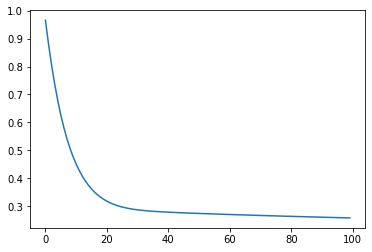

ValueError: too many values to unpack (expected 2)

In [49]:
w,b=neurones(x,y)

[0.26051801]


array([False])

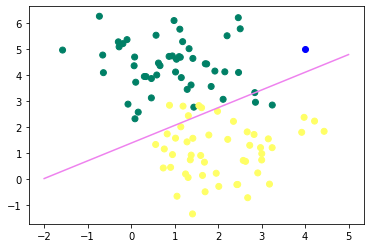

In [50]:
new_plant=np.array([4,5])
x1=np.linspace(-2,5,100)
x2=(-w[0]*x1-b)/w[1]
plt.scatter(x[:,0],x[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0],new_plant[1], c='b')
plt.plot(x1,x2, c='violet')
plt.show
predict(new_plant,w,b)